In [ ]:
'''Ex.No:6 Performance Analysis on Simple Linear Regression

Reg:URK22AI1026 
Aim
To implement the linear regression model for the given dataset and to demonstrate the
performance analysis on regression techniques

Description

Linear Regression

Regression searches for relationships among variables. Regression is used to build a prediction
model to predict the response (y) from the input variables (x) where the prediction is based on the
previous data.
Linear regression model defines a linear relationship between the output variable (y) and a
combination of one or more input variables (x)'''

In [ ]:
'''Simple linear regression

This model has single independent and single dependent variable.
Eg: the experience impact salaries

B 0  = the y-intercept
B 1 = the regression coefficient (slope)
Calculation of B 0 and B 1 :
Formula for B 1

Formula for B 0

Performance Metrics for Regression Problems

Various performance metrics that can be used to evaluate predictions for regression
problems are mean absolute error, mean squared error and R squared value

Mean Absolute Error (MAE)

It is the simplest error metric used in regression problems. It is basically the sum of
average of the absolute difference between the predicted and actual values.
mean_absolute_error function of sklearn.metrics is used to compute MAE.

Mean Square Error (MSE)

MSE is like the MAE, but the only difference is that the it squares the difference of
actual and predicted output values before summing them all instead of using the absolute
value.


mean_squared_error function of sklearn.metrics to compute MSE.

R Squared (R 2 )
R Squared metric is generally used for explanatory purpose and provides
an indication of the goodness or fit of a set of predicted output values to the
actual output values.

'''

In [69]:
import numpy as np;
import pandas as pd;
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
data = pd.DataFrame()
df = pd.read_csv('heartR.csv')
df


,Unnamed: 0,biking,smoking,heart.disease
0,1,30.801246,10.896608,11.769423
1,2,65.129215,2.219563,2.854081
2,3,1.959665,17.588331,17.177803
3,4,44.800196,2.802559,6.816647
4,5,69.428454,15.974505,4.062224
...,...,...,...,...
493,494,47.660440,27.562464,11.294392
494,495,45.097203,21.385620,9.616762
495,496,8.279743,6.423720,13.495168
496,497,42.345863,20.741328,10.115865


In [70]:
corr = df.corr()
print(corr)

               Unnamed: 0    biking   smoking  heart.disease
Unnamed: 0       1.000000  0.057088  0.052674      -0.051725
biking           0.057088  1.000000  0.015136      -0.935455
smoking          0.052674  0.015136  1.000000       0.309131
heart.disease   -0.051725 -0.935455  0.309131       1.000000


In [71]:
df.dropna(inplace=True)
df

,Unnamed: 0,biking,smoking,heart.disease
0,1,30.801246,10.896608,11.769423
1,2,65.129215,2.219563,2.854081
2,3,1.959665,17.588331,17.177803
3,4,44.800196,2.802559,6.816647
4,5,69.428454,15.974505,4.062224
...,...,...,...,...
493,494,47.660440,27.562464,11.294392
494,495,45.097203,21.385620,9.616762
495,496,8.279743,6.423720,13.495168
496,497,42.345863,20.741328,10.115865


In [72]:
x=np.array(df[['biking']])
y=df[['heart.disease']]

In [73]:
#create a model
model = LinearRegression(fit_intercept =  True)

In [79]:
#train the model
model.fit(x,y)
print('Intercept : \n' ,model.intercept_)
print('Coefficients : \n' ,model.coef_)


Intercept : 
 [17.69788434]
Coefficients : 
 [[-0.19909136]]


In [80]:
#predict the model
ypred = model.predict(x)
error = (y-ypred)**2
print("error",error.sum()/400)
print(x.shape)

error heart.disease    3.244349
dtype: float64
(498, 1)


In [81]:
#Quantitative evaluation
from sklearn import metrics
print("MSE :",metrics.mean_squared_error(ypred,y))
print("R^2 :",metrics.r2_score(ypred,y))

MSE : 2.6059027995905453
R^2 : 0.8572433472849748


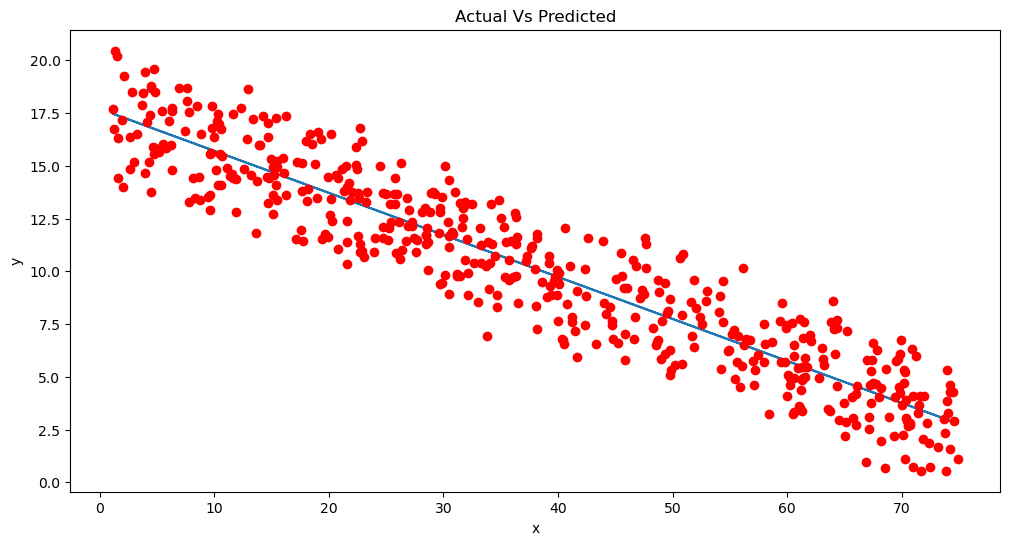

In [82]:
#plot regression against actual data
plt.figure(figsize=(12,6))
plt.plot(x,ypred)     #regression line
plt.plot(x,y,'ro')    #scatter plot showing actual data
plt.title("Actual Vs Predicted")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [85]:
import numpy as np;
import pandas as pd;
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
data = pd.DataFrame()
df = pd.read_csv('incomeR.csv')
df




,Unnamed: 0,income,happiness
0,1,3.862647,2.314489
1,2,4.979381,3.433490
2,3,4.923957,4.599373
3,4,3.214372,2.791114
4,5,7.196409,5.596398
...,...,...,...
493,494,5.249209,4.568705
494,495,3.471799,2.535002
495,496,6.087610,4.397451
496,497,3.440847,2.070664


In [86]:
# Assuming you have the following dataset:
x_train = np.array(df['income'])
y_train = np.array(df['happiness'])



In [89]:
# Calculate the mean of x and y
mean_x = np.mean(x_train)
mean_y = np.mean(y_train)



In [90]:
# Calculate the sum of x, x^2, y, and x*y
sum_x = np.sum(x_train)
sum_x_sq = np.sum(x_train**2)
sum_y = np.sum(y_train)
sum_xy = np.sum(x_train * y_train)

# Calculate the slope (b1) and intercept (b0)
b1 = (sum_xy - (mean_x * sum_y) / len(x_train)) / (sum_x_sq - (mean_x**2) * len(x_train))
b0 = mean_y - b1 * mean_x

# Predict y for a given x
def predict_y(x):
    return b0 + b1 * x

# Calculate performance metrics
mse = np.mean((y_train - predict_y(x_train))**2)
mae = np.mean(np.abs(y_train - predict_y(x_train)))
rmse = np.sqrt(mse)
r2 = 1 - (np.sum((y_train - predict_y(x_train))**2) / np.sum((y_train - mean_y)**2))

print("Intercept: ", b0)
print("Slope: ", b1)
print("MSE: ", mse)
print("MAE: ", mae)
print("RMSE: ", rmse)
print("R2: ", r2)

Intercept:  -22.21985226964557
Slope:  5.733886584785649
MSE:  76.44271479532442
MAE:  7.6266767139719756
RMSE:  8.743152451794742
R2:  -36.31040486545217


In [ ]:
'''
Result:
To implement the linear regression model for the given dataset and to demonstrate the
performance analysis on regression techniques is executed successfully

'''